# Getting started with plotting Ribbit Network observations

You've set up your "Frog" sensor, and/or downloaded Ribbit Network observations from the [data dashboard](https://dashboard.ribbitnetwork.org/), how can you get started analyzing these observations? 

This notebook will guide you though reading Ribbit Network observations from a csv file, plotting and interpreting those observations, and how to get started with some qualatative analysis. The next notebook will introduce some quantatative analysis methods you may be interested in using.

<div class="alert alert-block alert-info">

## Take a moment to think about... 
    
### When you get a set of measurements...

First, ask yourself: what do you want to learn from this data?
    
- What is your hypothesis? 
- What would it look like if the data supports your hypothesis? 
- What would it look like if the data do not support your hypothesis?

Then, plot your data, and remember to always label your plots clearly. Think about why are you plotting the data and what are you trying to see. You probably have some particular question in mind (you hypothesis), this should inform your choise of analysis technique, and what you want to plot and visualize.
    
#### Units and significant figures:

- Keep track of **units**, and always report units with your numbers
  - Make sure to check metadata or data documentation about how the measurements were made and what units they are in
- Significant figures
  - Consider the certainty with which you know a value, and don't include any more precision beyond that (e.g. $[CO_2]$ = 400.00012 ppm versus $[CO_2]$ = 400 ppm)
  - Note: Rounding errors - Allow the computer to include full precision for intermediate calculations, round to significant figures for the final result of the computation that you report in the answer
</div>

---
## Graphical Data Analysis

Here we will walk though plotting Ribbit Network observations from a single Frog sensor. The goal is to see how each plot can show us different information about the observations. Depending on our particular hypothesis, some plots will be more useful than others.

To start, we will import some python packages:

In [1]:
# numpy has a lot of math and statistics functions we'll need to use
import numpy as np

# pandas gives us a way to work with and plot tabular datasets easily (like a spreadsheet or csv files)
import pandas as pd

# the scipy library includes statistics functions we can use to test hypotheses about our data
import scipy.stats as stats

# we'll use matplotlib for plotting (pandas also uses matplotlib in some of its own plotting functions)
import matplotlib.pyplot as plt 
from matplotlib import dates # import the dates module to help with formatting date/time labels on plots

# tell jupyter how to make our plots, "widget" for interactive plots, or "inline" for static plots
%matplotlib inline

Open the data file using the pandas [read_csv function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [2]:
# Create a variable the contains the relative filepath to the csv file we want to open
data_file_path = 'data/frog1_30d1m.csv'

# Use pandas.read_csv() function to open this file.
# This stores the data in a "Data Frame"
my_data = pd.read_csv(data_file_path)

In [3]:
# look at the first few rows of data with the .head() method
my_data.head()

,Time,CO2 (PPM),Humidity (%),Temperature (degC),Barometric Pressure (mBar),Latitude,Longitude
0,2023-06-20T21:30:00-07:00,416.450200,82.972410,14.080494,1018.054000,47.71,-122.18
1,2023-06-20T21:31:00-07:00,423.509927,82.467095,14.510223,1018.062000,47.71,-122.18
2,2023-06-20T21:32:00-07:00,455.278700,81.132510,14.879460,1018.071000,47.71,-122.18
3,2023-06-20T21:33:00-07:00,439.838186,79.478017,15.225836,1018.085000,47.71,-122.18
4,2023-06-20T21:34:00-07:00,432.147009,77.503135,15.615975,1018.119818,47.71,-122.18


In [4]:
# We need to tell pandas to interpret our "Time" column a "datetime" objects,
# and to use the "Time" column as our index

# set our Time column to a pandas datetime format
my_data['Time'] = pd.to_datetime(my_data['Time'], format='mixed')

# We want to use our "Time" column as the index of the dataframe
my_data.set_index('Time', inplace=True)

### Timeseries plots

We can use a timeseries plot if we are interested in seeing how some variable changes over time. In the example below, we will plot the air temperature observations from this sensor.

<div class="alert alert-block alert-success">
<b>Try it yourself!</b> After running the code below to make the air temperature plot, try changing the code so that it plots another variable. Make sure to edit the axes labels, plot title, and filename for saving the plot image as appropriate. To see a list of variables (columns) in the data frame we loaded from the csv file, you can run the following line of code in an empty cell:
    <pre>my_data.columns</pre>
</div>

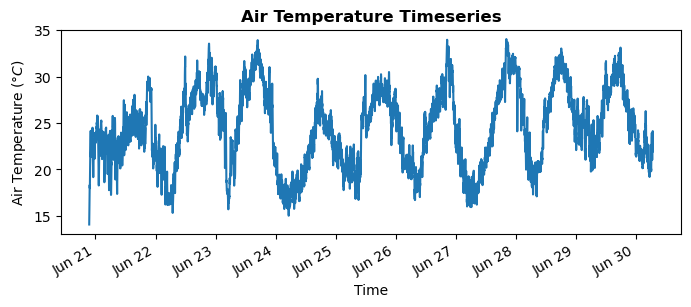

In [5]:
# create a figure, and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))

# plot the temperature observations
ax = my_data['Temperature (degC)'].plot()

# custom date format for x-axis labels (see https://strftime.org/ for how to format dates)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d')) 

# label the y-axis (we can use LaTeX syntax to render special characters)
ax.set_ylabel('Air Temperature ($\degree C$)') 

# give the figure a title
ax.set_title('Air Temperature Timeseries', fontweight='bold')

# save a copy of the figure as an image
plt.savefig('ribbit_air_temp_timeseries.jpg')

**Interpret the plot you just made:**
- What does this plot show us about how this variable changes over time?
- Do you see any repeating patterns or trends?
- Is there a particular time of day when values are lower or higher?

What we plotted above were the raw observations taken every 1-minute. This data can sometimes look very noisy and perhaps be hard to interpret. We can also compute hourly averages with the [resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) method in pandas.

<div class="alert alert-block alert-success">
<b>Try it yourself!</b> After running the code below, read the documentation for <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html">resample</a>, and try resampling the dataframe at shorter (such as 30-minutes), or longer (such as 6-hour) time steps.
</div>

In [6]:
# Here we will resample our data to 1-hour time steps and save that new dataframe to a new variable
# ("1H" stands for 1-hour, see the documentation for pandas resample)
my_data_hourly = my_data.resample('1H').mean()

**Now plot all of our data variables together, resampled to hourly average**

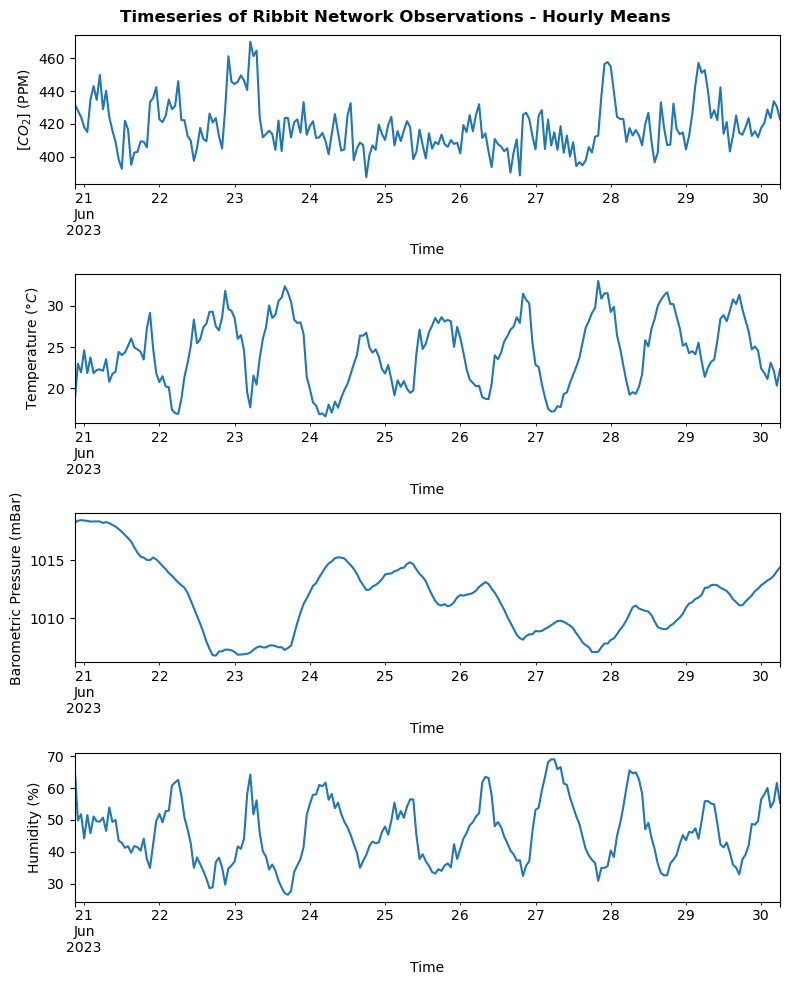

In [7]:
# create a figure, with 4 rows of subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8,10), tight_layout=True)

# get an individual axis from the list of all axes (our 4 subplots)
[ax_co2, ax_temp, ax_pres, ax_rh] = axes.ravel()

# plot carbon dioxide concentration
my_data_hourly['CO2 (PPM)'].plot(ax=ax_co2)
# label the y-axis
ax_co2.set_ylabel('[$CO_2$] (PPM)') 

# plot temperature
my_data_hourly['Temperature (degC)'].plot(ax=ax_temp)
# label the y-axis
ax_temp.set_ylabel('Temperature ($\degree C$)') 

# plot barometric pressure
my_data_hourly['Barometric Pressure (mBar)'].plot(ax=ax_pres)
# label the y-axis
ax_pres.set_ylabel('Barometric Pressure (mBar)') 

# plot relative humidity
my_data_hourly['Humidity (%)'].plot(ax=ax_rh)
# label the y-axis
ax_rh.set_ylabel('Humidity (%)') 

# give the figure a title
plt.suptitle('Timeseries of Ribbit Network Observations - Hourly Means', fontweight='bold')

# save a copy of the figure as an image
plt.savefig('ribbit_hourly_avg_timeseries.jpg')

---

### Histogram plots

- We are probably interested in what kind of distribution our data has.
- Make a histogram plot to quickly inspect (Note: Careful with the choice of [number or width of bins](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width))
- See documentation for making [histograms with pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist), and [histograms with matplotlib](https://matplotlib.org/3.1.3/gallery/statistics/hist.html)

<div class="alert alert-block alert-success">
<b>Try it yourself!</b> After running the code below, try plotting the distribution of our different variables. What do each of these distributions tell you about the observations? Do they have narrow or broad distributions? Is there one peak in the distribution or more than one?
</div>

Text(0.5, 1.0, 'Carbon Dioxide Concentration (PPM) Histogram')

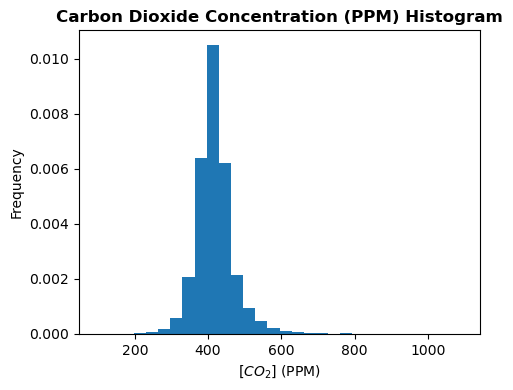

In [8]:
fig, ax = plt.subplots(figsize=(5,4), tight_layout=True)
my_data['CO2 (PPM)'].plot.hist(bins=30, density=True, ax=ax)
ax.set_xlabel('[$CO_2$] (PPM)')
plt.title('Carbon Dioxide Concentration (PPM) Histogram', fontweight='bold')

### Boxplots

- A [boxplot](https://en.wikipedia.org/wiki/Box_plot) (sometimes called "box-and-whisker" plots) can also help visualize a distribution, especially when we want to compare multiple data sets side by side.
- The box usually represents the interquartile range (IQR) (between the 25th and 75th percentiles)
- Symbols (lines, circles, etc) within the box can represent the sample mean and/or median
- Vertical line "whiskers" can represent the full range (minimum to maximum) or another percentile range (such as 2nd and 98th percentiles)
- Data points beyond the "whiskers" are "outliers"
- What each symbol represents can vary, so be sure to check documentation to be sure! See documentation for making [boxplots with pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), and [boxplots with matplotlib](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.boxplot.html).

Here we will divide our dataset into two groups for comparison. For this set of observations, I'm curious if $[CO_2]$ in colder temperatures has a much different distribution than $[CO_2]$ in warmer temperatures. Thereore I will split the dataset in two, based on observations above or below the average temperature for the whole dataset.

In [9]:
# find our average temperature
average_temp = my_data['Temperature (degC)'].mean()

# create a new dataset with only observations where temperatures were below average
my_data_colder = my_data[my_data['Temperature (degC)'] < average_temp]

# create a new data with only observations where temperatures were above or equal to average
my_data_warmer = my_data[my_data['Temperature (degC)'] >= average_temp]

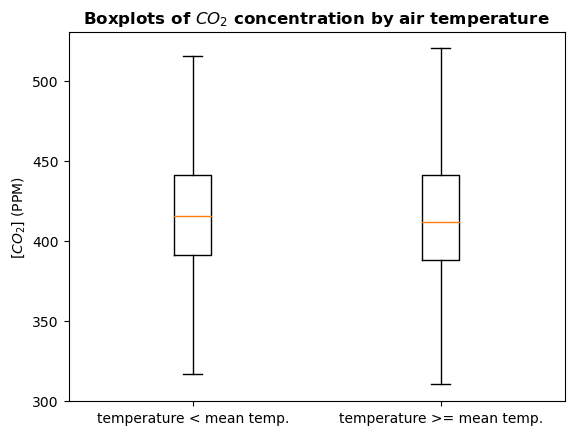

In [10]:
# Now make a boxplot of CO2 concentrations from each of these two groups
# this will help us to visually inspect if it looks like there is a difference

plt.boxplot([my_data_colder['CO2 (PPM)'], my_data_warmer['CO2 (PPM)']], 
            labels=('temperature < mean temp.','temperature >= mean temp.'), showfliers=False)

plt.ylabel('[$CO_2$] (PPM)')
plt.title('Boxplots of $CO_2$ concentration by air temperature', fontweight='bold');

It looks like there is no difference in the distribution of $[CO_2]$ between when there are colder or warmer temperatures.

<div class="alert alert-block alert-success">
<b>Try it yourself!</b> After running the code above, try splitting the dataset into two or more groups by another variable to see if CO2 concentration is different between those groups.
</div>

---

### Scatterplots

- If we're looking for relationships between variables within our data, try making [scatterplots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html). 
- But remember that **correlation does not equal causation!** Just because two variable are correlated, without further statistical tests, observations, or physical interpretations of the system, we cannot yet say that changes in one variable leads to changes in the other variable.

Here we will plot two variables on a scatter plot to see if they are related in some way.

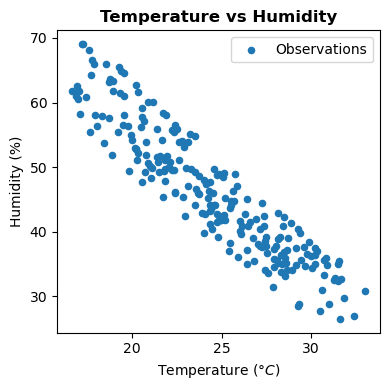

In [11]:
fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
my_data_hourly.plot.scatter(x='Temperature (degC)', y='Humidity (%)', ax=ax, label='Observations')
ax.set_xlabel('Temperature ($\degree C$)') 
ax.set_ylabel('Humidity (%)')
ax.set_title('Temperature vs Humidity', fontweight='bold')
plt.legend()

On this plot, it looks like temperature and humidity have a strong linear relationship. Without implying causation or the physical meaning for this relationship yet, we can still build an empirical model (that is, a model based on observations) to try and predict humidity given a temperature measurement.

We will use the [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) function for linear regression. You are strongly encouraged to read the documentation about how this function works. When we give it x and y values, it will use least-squared linear regression and return the slope and intercept for a linear function, the r-value (Pearson correlation coefficient), p-value (from a hypothesis test that the slope is 0), and the standard error of the slope estimate. These values can be used to not only predict a humidity value given a temperature value, but also assign a level of confidence to our prediction. Here we'll just use them to make a simple prediction.

In [12]:
# For clarity, assign the hourly average temperature to a variable x
x = my_data_hourly['Temperature (degC)']
# and hourly average humidity to a variable y
y = my_data_hourly['Humidity (%)']

# run the linear regression function, right now we only need the slope (m) and intercept (b) outputs
m, b, r, p, stderr = stats.linregress(x, y)

# create y values based on our linear model
x_linear_model = np.arange(min(x), max(x), 2)
y_linear_model = m*x_linear_model + b

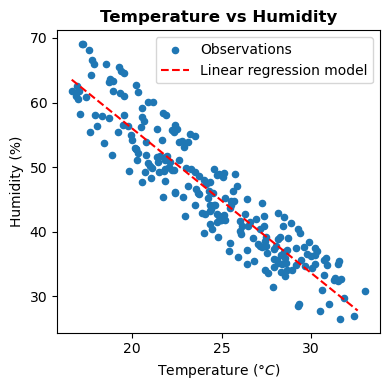

In [13]:
# Plot the original data, and our new linear model
fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
my_data_hourly.plot.scatter(x='Temperature (degC)', y='Humidity (%)', ax=ax, label='Observations')

ax.plot(x_linear_model, y_linear_model, color='red', linestyle='--', label='Linear regression model')

ax.set_xlabel('Temperature ($\degree C$)') 
ax.set_ylabel('Humidity (%)')
ax.set_title('Temperature vs Humidity', fontweight='bold')
plt.legend()

## Be careful! Depending only on the axes limits we choose, we can make the data look very different


## Adding a regression line can sometimes be misleading (suggesting there's a trend even if there isn't)


## Just because I've plotted a linear regression here, but doesn't mean that it's statistically significant!




# We can make the data look a lot different by just changing the axes limites
# This can be misleading, be careful!

Now make a prediction: What if we had a temperature observation of 27 degrees C, what might our relative humidity be (in %)?

In [14]:
x_predictor = 27
y_prediction = m*x_predictor + b

# print the result
print(y_prediction)

# round the result to 1 decimal place, and print
print(np.round(y_prediction, 1))

40.324495083088905
40.3


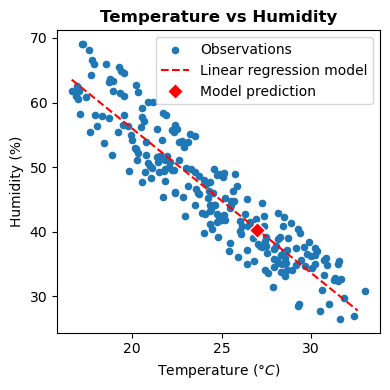

In [15]:
# Add our prediction to the plot
fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
my_data_hourly.plot.scatter(x='Temperature (degC)', y='Humidity (%)', ax=ax, label='Observations')

ax.plot(x_linear_model, y_linear_model, color='red', linestyle='--', label='Linear regression model')

ax.plot(x_predictor, y_prediction, linestyle='none', marker='D', 
        markersize=8, markerfacecolor='red', markeredgecolor='white',
        label='Model prediction')

ax.set_xlabel('Temperature ($\degree C$)') 
ax.set_ylabel('Humidity (%)')
ax.set_title('Temperature vs Humidity', fontweight='bold')
plt.legend()

---

<div class="alert alert-block alert-warning">
    
### Ethics in graphical analysis

- Be careful, others could try and manipulate plots and statistics to convince us of something
- We can end up tricking outselves with "wishful thinking" and "confirmation bias" if we are not careful (this is there are quantitative statistical tests, they're our attempt to find objective measures of "is this a true trend")
- You wouldn't want to publish a report with a trendline through data when there isn't a statistically significant trend, this can be misleading and imply a relationship between two variable though none may exist.
</div>